# County Level Data

## Data Cleaning and Aggregation

### Community Resilience Data

In [2]:
import pandas as pd

In [336]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [680]:
data_path = "../data/CensusBureau/"

In [681]:
data_file = "CommunityReslienceEstimates_2018.csv"

In [682]:
cre_df = pd.read_csv(data_path + data_file, dtype = {
    "geoid" : str,
    "state" : str,
    "county": str,
    "tract" : str,
    "stname": str,
    "stabrev": str,
    "ctname": str,
    "geo_level": str,
    "popuni" : float,
    'prednum_0': float, 
    'prednum_0_moe' : float, 
    'predrt_0' : float,
    'predrt_0_moe': float, 
    'prednum_12': float, 
    'prednum_12_moe': float, 
    'predrt_12': float,
    'predrt_12_moe': float, 
    'prednum_3': float, 
    'prednum_3_moe': float, 
    'predrt_3': float,
    'predrt_3_moe': float
})

#### Restrict dataset to just county-level data

In [683]:
cre_df_county = cre_df[cre_df.geo_level == "County"].reset_index()

In [684]:
cre_df_county.drop(labels=["index", "stname", "state", "tract", "geo_level"], axis=1, inplace=True)

In [685]:
cre_df_county.rename({"geoid" : "fips"}, axis=1, inplace=True)

#### Keep only percentage data

In [686]:
drops = []
for column in cre_df_county.columns:
    if "num" in column:
        drops.append(column)

In [687]:
cre_df_county.drop(drops, axis=1, inplace=True)

In [690]:
cre_df_county.drop(["county", "stabrev"], axis=1, inplace=True)

## Vaccine Hesitancy Data

In [691]:
data_file ="../data/CDC/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv"

In [692]:
hesitancy = pd.read_csv(data_file, dtype=col_dict)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [693]:
col_dict = {}
for column in hesitancy.columns:
    if column == "FIPS Code" or column == "County Name" or "State" in column:
        col_dict[column] = str
    elif column == "SVI Category" or column == "CVAC Level Of Concern":
        col_dict[column] = str
    else:
        col_dict[column] = float  

In [694]:
hesitancy.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),State Code
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,AL
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,AL
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,AL
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,AL
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,0.163,AL


#### Convert to the 5 digit FIPS code

In [697]:
for ix, row in hesitancy.iterrows():
    if len(row["FIPS Code"]) == 4:
        new_fips = "0" + row["FIPS Code"]
        hesitancy.at[ix, "FIPS Code"] = new_fips
        

In [698]:
hesitancy.drop(["County Name"], axis=1, inplace=True)

In [699]:
hesitancy.rename({"FIPS Code" : "fips"}, axis=1, inplace=True)

#### Merge with resilience data

In [700]:
df = cre_df_county.merge(hesitancy, on="fips")

In [701]:
df.head()


,fips,ctname,popuni,predrt_0,predrt_0_moe,predrt_12,predrt_12_moe,predrt_3,predrt_3_moe,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),State Code
0,01001,Autauga County,55420.0,31.66,7.26,44.74,7.80,23.60,6.51,ALABAMA,0.1685,0.2233,0.1272,0.44,Moderate Vulnerability,0.61,High Concern,0.288,AL
1,01003,Baldwin County,216666.0,29.84,5.96,45.44,6.51,24.72,5.68,ALABAMA,0.1544,0.1988,0.1169,0.22,Low Vulnerability,0.23,Low Concern,0.336,AL
2,01005,Barbour County,22210.0,18.70,5.96,46.19,7.21,35.11,6.80,ALABAMA,0.1676,0.2337,0.1274,1.00,Very High Vulnerability,0.89,Very High Concern,0.257,AL
3,01007,Bibb County,20396.0,24.58,7.05,46.77,7.94,28.64,7.11,ALABAMA,0.1808,0.2526,0.1390,0.60,High Vulnerability,0.76,High Concern,0.222,AL
4,01009,Blount County,57711.0,28.96,5.66,43.45,6.29,27.59,5.58,ALABAMA,0.1854,0.2362,0.1416,0.42,Moderate Vulnerability,0.80,High Concern,0.215,AL


## Poverty data

### MISSING NM

In [702]:
poverty_data = "../data/USDA_poverty/USDA_poverty_2019.csv"

In [703]:
poverty_df = pd.read_csv(poverty_data)

In [704]:
poverty_df.head()

,fips,county,ruc_code,total_all_people,total_all_people_min,total_all_people_max,under18,under18_min,under18_max,type,state
0,28001,Adams,5,27.9,22.2,33.6,40.8,30.3,51.3,percent,Mississippi
1,28003,Alcorn,7,17.3,13.6,21.0,23.7,16.5,30.9,percent,Mississippi
2,28005,Amite,8,20.9,16.4,25.4,29.1,20.3,37.9,percent,Mississippi
3,28007,Attala,6,24.1,19.3,28.9,35.0,25.9,44.1,percent,Mississippi
4,28009,Benton,1,20.7,15.4,26.0,31.1,20.9,41.3,percent,Mississippi


#### Keep only percent data

In [705]:
poverty = poverty_df[poverty_df.type == "percent"]

In [706]:
poverty.dtypes

fips                     int64
county                  object
ruc_code                 int64
total_all_people        object
total_all_people_min    object
total_all_people_max    object
under18                 object
under18_min             object
under18_max             object
type                    object
state                   object
dtype: object

In [708]:
for col in poverty.columns[3:-3]:
    poverty[col] = poverty[col].astype(float)

<ipython-input-708-02bcc28ee8f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poverty[col] = poverty[col].astype(float)


In [709]:
poverty.fips = poverty.fips.astype(str)

/Users/enceladosaurus/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Convert to 5 digit FIPS code

In [710]:
for ix, row in poverty.iterrows():
    if len(row["fips"]) == 4:
        new_fips = "0" + row["fips"]
        poverty.at[ix, "fips"] = new_fips

In [713]:
"New Mexico" in poverty.state.to_list()

False

In [711]:
poverty.head()

,fips,county,ruc_code,total_all_people,total_all_people_min,total_all_people_max,under18,under18_min,under18_max,type,state
0,28001.0,Adams,5,27.9,22.2,33.6,40.8,30.3,51.3,percent,Mississippi
1,28003.0,Alcorn,7,17.3,13.6,21.0,23.7,16.5,30.9,percent,Mississippi
2,28005.0,Amite,8,20.9,16.4,25.4,29.1,20.3,37.9,percent,Mississippi
3,28007.0,Attala,6,24.1,19.3,28.9,35.0,25.9,44.1,percent,Mississippi
4,28009.0,Benton,1,20.7,15.4,26.0,31.1,20.9,41.3,percent,Mississippi


In [235]:
poverty.drop(["ruc_code", "total_all_people_min", "total_all_people_max", "under18_min", "under18_max", "type", "state", "county"], axis=1, inplace=True)

/Users/enceladosaurus/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Merge poverty data

In [309]:
df = df.merge(poverty, on="fips")

## Voting Data

In [714]:
vote_data = "../data/vote_results/county_level_vote_results.csv"

In [715]:
vote_df = pd.read_csv(vote_data, usecols=["county_fips", "per_biden", "per_trump"], dtype={
    "county_fips": int, 
    "per_biden": float, 
    "per_trump" : float})

In [716]:
vote_df.head()

,county_fips,per_biden,per_trump
0,1001,27.018365,71.436802
1,1003,22.409030,76.171373
2,1005,45.788173,53.451226
3,1007,20.698280,78.426264
4,1009,9.569378,89.571553


In [717]:
vote_df.county_fips = vote_df.county_fips.astype(str)

#### Convert to 5 digit FIPS

In [718]:
for ix, row in vote_df.iterrows():
    if len(row["county_fips"]) == 4:
        new_fips = "0" + row["county_fips"]
        vote_df.at[ix, "county_fips"] = new_fips
        

In [719]:
vote_df.rename({"county_fips" : "fips"}, axis=1, inplace=True)

#### Merge with aggregated data

In [720]:
df = df.merge(vote_df, on="fips")

#### Rename columns for clarity

In [313]:
renames = {'total_all_people': "poverty_pct_total_all_people",
           'under18' : "poverty_pct_under18"}

In [314]:
df.rename(renames, axis=1, inplace=True)

## Add Demographics Data

In [725]:
demographics = pd.read_csv("../data/CensusBureau/CountyDemographics.csv")

#### Filter by age group = "all"

In [726]:
demographics = demographics[demographics.AGEGRP == 0]

#### Filter to just 2019 data

In [727]:
demographics = demographics[demographics.YEAR == 10]

#### Create percentages from the number data

In [728]:
demographics['pct_female'] = demographics.TOT_FEMALE / demographics.TOT_POP

In [729]:
demographics['pct_male'] = demographics.TOT_MALE / demographics.TOT_POP

In [730]:
for column in demographics.columns[10:]:
    if "_MALE" in column:
        prefix = column.split("_")[0]
        new_name = prefix + "_MALE_PCT"
        new_female = prefix + "_FEMALE_PCT"
        total_name = prefix + "_TOTAL_PCT"
        female = prefix + "_FEMALE"
        demographics[new_name] = demographics[column] / demographics.TOT_MALE
        demographics[new_female] = demographics[female] / demographics.TOT_FEMALE
        demographics[total_name] = (demographics[column] + demographics[female])/demographics.TOT_POP        

#### Remove non-percentage data

In [731]:
drops = []
for column in demographics.columns[10:]:
    if "PCT" not in column and "pct" not in column:
        drops.append(column)

In [732]:
drops += ["SUMLEV", "COUNTY", "YEAR", "AGEGRP", "TOT_POP", "TOT_MALE", "TOT_FEMALE"]

In [733]:
dem_cleaned = demographics.drop(drops, axis=1)

In [734]:
dem_cleaned.head()

,STATE,STNAME,CTYNAME,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT
171,1,Alabama,Autauga County,0.512367,0.487633,0.772899,0.764799,0.768749,0.190263,0.198591,0.194530,0.004073,0.005180,0.004640,0.010885,0.013566,0.012259,0.001111,0.000916,0.001011,0.020770,0.016949,0.018812,0.791818,0.780338,0.785936,0.201185,0.207329,0.204333,0.009885,0.010465,0.010182,0.017068,0.018076,0.017584,0.002073,0.001938,0.002004,0.969567,0.974031,0.971854,0.748389,0.743446,0.745857,0.187153,0.196582,0.191984,0.003554,0.004581,0.004080,0.010774,0.013319,0.012078,0.000666,0.000669,0.000668,0.019030,0.015433,0.017187,0.765939,0.757681,0.761708,0.197075,0.204581,0.200921,0.008441,0.009020,0.008738,0.016623,0.017548,0.017097,0.001444,0.001409,0.001426,0.030433,0.025969,0.028146,0.024509,0.021353,0.022892,0.003110,0.002008,0.002546,0.000518,0.000599,0.000560,0.000111,0.000247,0.000181,0.000444,0.000247,0.000343,0.001740,0.001515,0.001625,0.025879,0.022657,0.024228,0.004110,0.002748,0.003412,0.001444,0.001445,0.001444,0.000444,0.000529,0.000487,0.000629,0.000529,0.000578
399,1,Alabama,Baldwin County,0.514316,0.485684,0.875429,0.871111,0.873208,0.089897,0.091242,0.090589,0.008342,0.007063,0.007684,0.008371,0.012452,0.010470,0.000668,0.000631,0.000649,0.017293,0.017502,0.017401,0.891695,0.887505,0.889540,0.096970,0.098726,0.097873,0.016528,0.014986,0.015735,0.012217,0.016413,0.014375,0.001531,0.001537,0.001534,0.950290,0.958373,0.954447,0.830805,0.833591,0.832238,0.088211,0.089503,0.088876,0.007121,0.006441,0.006771,0.008235,0.012369,0.010361,0.000436,0.000540,0.000489,0.015482,0.015928,0.015711,0.845511,0.848604,0.847102,0.094460,0.096255,0.095384,0.014203,0.013504,0.013843,0.011810,0.015901,0.013914,0.001104,0.001171,0.001139,0.049710,0.041627,0.045553,0.044624,0.037520,0.040970,0.001686,0.001738,0.001713,0.001221,0.000622,0.000913,0.000136,0.000082,0.000108,0.000233,0.000091,0.000160,0.001812,0.001574,0.001689,0.046184,0.038901,0.042438,0.002509,0.002470,0.002489,0.002325,0.001482,0.001892,0.000407,0.000512,0.000461,0.000426,0.000366,0.000395
627,1,Alabama,Barbour County,0.474103,0.525897,0.493802,0.496185,0.494932,0.480726,0.481596,0.481138,0.007029,0.005198,0.006161,0.004157,0.005366,0.004730,0.002268,0.001174,0.001749,0.012018,0.010480,0.011289,0.502192,0.504821,0.503438,0.488738,0.488891,0.488810,0.012698,0.008971,0.010931,0.006122,0.006707,0.006400,0.002948,0.001593,0.002306,0.952986,0.959168,0.955917,0.456311,0.462396,0.459196,0.477400,0.477740,0.477561,0.003023,0.003018,0.003021,0.00415

#### What counties are missing in the main data?

In [736]:
counties = df.ctname.to_list()

In [737]:
counties = [x.lower() for x in counties]

In [738]:
missing = [x for x in dem_cleaned.CTYNAME if x.lower() not in counties]

#### Clean county names to merge on 

In [740]:
df.ctname = df.ctname.str.lower()

In [741]:
dem_cleaned.STNAME = dem_cleaned.STNAME.str.upper()

In [742]:
dem_cleaned.rename({"CTYNAME" : "ctname", "STNAME": "State"}, axis=1, inplace=True)

In [743]:
dem_cleaned.ctname = dem_cleaned.ctname.str.lower()

#### Merge

In [744]:
df = df.merge(dem_cleaned, on=["ctname", "State"])

In [745]:
df.head()

,fips,ctname,popuni,predrt_0,predrt_0_moe,predrt_12,predrt_12_moe,predrt_3,predrt_3_moe,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),State Code,per_biden,per_trump,STATE,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT
0,01001,autauga county,55420.0,31.66,7.26,44.74,7.80,23.60,6.51,ALABAMA,0.1685,0.2233,0.1272,0.44,Moderate Vulnerability,0.61,High Concern,0.288,AL,27.018365,71.436802,1,0.512367,0.487633,0.772899,0.764799,0.768749,0.190263,0.198591,0.194530,0.004073,0.005180,0.004640,0.010885,0.013566,0.012259,0.001111,0.000916,0.001011,0.020770,0.016949,0.018812,0.791818,0.780338,0.785936,0.201185,0.207329,0.204333,0.009885,0.010465,0.010182,0.017068,0.018076,0.017584,0.002073,0.001938,0.002004,0.969567,0.974031,0.971854,0.748389,0.743446,0.745857,0.187153,0.196582,0.191984,0.003554,0.004581,0.004080,0.010774,0.013319,0.012078,0.000666,0.000669,0.000668,0.019030,0.015433,0.017187,0.765939,0.757681,0.761708,0.197075,0.204581,0.200921,0.008441,0.009020,0.008738,0.016623,0.017548,0.017097,0.001444,0.001409,0.001426,0.030433,0.025969,0.028146,0.024509,0.021353,0.022892,0.003110,0.002008,0.002546,0.000518,0.000599,0.000560,0.000111,0.000247,0.000181,0.000444,0.000247,0.000343,0.001740,0.001515,0.001625,0.025879,0.022657,0.024228,0.004110,0.002748,0.003412,0.001444,0.001445,0.001444,0.000444,0.000529,0.000487,0.000629,0.000529,0.000578
1,01003,baldwin county,216666.0,29.84,5.96,45.44,6.51,24.72,5.68,ALABAMA,0.1544,0.1988,0.1169,0.22,Low Vulnerability,0.23,Low Concern,0.336,AL,22.409030,76.171373,1,0.514316,0.485684,0.875429,0.871111,0.873208,0.089897,0.091242,0.090589,0.008342,0.007063,0.007684,0.008371,0.012452,0.010470,0.000668,0.000631,0.000649,0.017293,0.017502,0.017401,0.891695,0.887505,0.889540,0.096970,0.098726,0.097873,0.016528,0.014986,0.015735,0.012217,0.016413,0.014375,0.001531,0.001537,0.001534,0.950290,0.958373,0.954447,0.830805,0.833591,0.832238,0.088211,0.089503,0.088876,0.007121,0.006441,0.006771,0.008235,0.012369,0.010361,0.000436,0.000540,0.000489,0.015482,0.015928,0.015711,0.845511,0.848604,0.847102,0.094460,0.096255,0.095384,0.014203,0.013504,0.013843,0.011810,0.015901,0.013914,0.001104,0.001171,0.001139,0.049710,0.041627,0.045553,0.044624,0.037520,0.040970,0.001686,0.001738,0.001713,0.001221,0.000622,0.000913,0.000136,0.000082,0.000108,0.00023

#### Drop unnecessary columns and duplicate data 

In [749]:
drops = ["Percent adults fully vaccinated against COVID-19 (as of 6/10/21)", 'State Code', "ctname", "popuni", "State", "STATE", "SVI Category", "CVAC Level Of Concern", "predrt_0_moe", "predrt_12_moe", "predrt_3_moe"]

In [750]:
cols = ["fips", "ctname", "State"]

In [751]:
fips = df[cols]

In [752]:
df_cleaned = df.drop(drops, axis=1)

#### Rename for clarity

In [753]:
rename_dict = {
    "predrt_0" : "zero_risk_factors_pct",
    "predrt_12" : "1or2_risk_factors_pct",
    "predrt_3": "three_plus_risk_factors_pct"
}

In [754]:
df_cleaned.rename(rename_dict, axis=1, inplace=True)

In [755]:
df_nan = df_cleaned[df_cleaned.isna().any(axis=1)]

In [756]:
df_nan

,fips,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT
1782,35039,17.99,50.04,31.97,0.061,0.1107,0.0314,NaN,0.62,66.093337,32.523454,0.510004,0.489996,0.774044,0.770265,0.772117,0.009051,0.007396,0.008207,0.191053,0.193303,0.192201,0.005774,0.007396,0.006601,0.002393,0.001999,0.002192,0.017685,0.01964,0.018682,0.791157,0.789055,0.790085,0.012536,0.010895,0.011699,0.203953,0.207496,0.20576,0.007698,0.009945,0.008844,0.002965,0.002599,0.002778,0.282809,0.292754,0.287881,0.128114,0.130085,0.129119,0.005098,0.002899,0.003976,0.138882,0.146227,0.142628,0.003849,0.005647,0.004766,0.000312,0.00045,0.000382,0.006554,0.007446,0.007009,0.134304,0.137131,0.135746,0.007126,0.004598,0.005837,0.143147,0.151024,0.147165,0.004577,0.006897,0.00576,0.000468,0.0007,0.000586,0.717191,0.707246,0.712119,0.64593,0.64018,0.642997,0.003953,0.004498,0.004231,0.052172,0.047076,0.049573,0.001925,0.001749,0.001835,0.002081,0.001549,0.00181,0.011131,0.012194,0.011673,0.656853,0.651924,0.654339,0.00541,0.006297,0.005862,0.060806,0.056472,0.058596,0.003121,0.003048,0.003084,0.002497,0.001899,0.002192


In [398]:
df_cleaned.head()

,fips,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,poverty_pct_total_all_people,poverty_pct_under18,per_biden,per_trump,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT
0,01001,31.66,44.74,23.60,0.1685,0.2233,0.1272,0.44,0.61,12.1,15.9,27.018365,71.436802,0.512367,0.487633,0.772899,0.764799,0.768749,0.190263,0.198591,0.194530,0.004073,0.005180,0.004640,0.010885,0.013566,0.012259,0.001111,0.000916,0.001011,0.020770,0.016949,0.018812,0.791818,0.780338,0.785936,0.201185,0.207329,0.204333,0.009885,0.010465,0.010182,0.017068,0.018076,0.017584,0.002073,0.001938,0.002004,0.969567,0.974031,0.971854,0.748389,0.743446,0.745857,0.187153,0.196582,0.191984,0.003554,0.004581,0.004080,0.010774,0.013319,0.012078,0.000666,0.000669,0.000668,0.019030,0.015433,0.017187,0.765939,0.757681,0.761708,0.197075,0.204581,0.200921,0.008441,0.009020,0.008738,0.016623,0.017548,0.017097,0.001444,0.001409,0.001426,0.030433,0.025969,0.028146,0.024509,0.021353,0.022892,0.003110,0.002008,0.002546,0.000518,0.000599,0.000560,0.000111,0.000247,0.000181,0.000444,0.000247,0.000343,0.001740,0.001515,0.001625,0.025879,0.022657,0.024228,0.004110,0.002748,0.003412,0.001444,0.001445,0.001444,0.000444,0.000529,0.000487,0.000629,0.000529,0.000578
1,01003,29.84,45.44,24.72,0.1544,0.1988,0.1169,0.22,0.23,10.1,13.5,22.409030,76.171373,0.514316,0.485684,0.875429,0.871111,0.873208,0.089897,0.091242,0.090589,0.008342,0.007063,0.007684,0.008371,0.012452,0.010470,0.000668,0.000631,0.000649,0.017293,0.017502,0.017401,0.891695,0.887505,0.889540,0.096970,0.098726,0.097873,0.016528,0.014986,0.015735,0.012217,0.016413,0.014375,0.001531,0.001537,0.001534,0.950290,0.958373,0.954447,0.830805,0.833591,0.832238,0.088211,0.089503,0.088876,0.007121,0.006441,0.006771,0.008235,0.012369,0.010361,0.000436,0.000540,0.000489,0.015482,0.015928,0.015711,0.845511,0.848604,0.847102,0.094460,0.096255,0.095384,0.014203,0.013504,0.013843,0.011810,0.015901,0.013914,0.001104,0.001171,0.001139,0.049710,0.041627,0.045553,0.044624,0.037520,0.040970,0.001686,0.001738,0.001713,0.001221,0.000622,0.000913,0.000136,0.000082,0.000108,0.000233,0.000091,0.000160,0.001812,0.001574,0.001689,0.046184,0.038901,0.042438,0.002509,0.002470,0.002489,0.002325,0.001482,0.001892,0.000407,0.000512,0.000461,0.000426,0.000366,0.000395
2,01005,18.70,46.19,35.11,0.1676,0.2337,0.1274,1.00,0.89,27.1,4

## Add Incarceration Data

In [757]:
jail_df = pd.read_csv("../data/incarceration_trends.csv")

In [758]:
jail_df = jail_df[jail_df.year == 2018]

In [759]:
jail_df.fips = jail_df.fips.astype(str)

In [760]:
for ix, row in jail_df.iterrows():
    if len(row["fips"]) == 4:
        new_fips = "0" + row["fips"]
        jail_df.at[ix, "fips"] = new_fips

#### Create percentages from population data

In [761]:
jail_df["jail_2018_pop_pct"] = jail_df["total_jail_pop"] / jail_df["total_pop"]

In [762]:
keeps = ["fips", "region", "urbanicity", "jail_2018_pop_pct"]

In [763]:
drops = [x for x in jail_df.columns if x not in keeps]

In [764]:
jail_df.drop(drops, axis=1, inplace=True)

In [825]:
jail_df[jail_df.isna().any(axis=1)]

,fips,urbanicity,region,jail_2018_pop_pct
3380,02016,rural,West,NaN
3429,02020,small/mid,West,NaN
3576,02068,rural,West,NaN
3674,02090,small/mid,West,NaN
3772,02105,rural,West,NaN
3919,02130,rural,West,NaN
3968,02150,rural,West,NaN
4017,02158,NaN,West,NaN
4213,02185,rural,West,NaN
4262,02188,rural,West,NaN


#### Merge

In [766]:
df_cleaned = df_cleaned.merge(jail_df, on="fips")

In [770]:
df_cleaned.head()

,fips,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT,urbanicity,region,jail_2018_pop_pct
0,01001,31.66,44.74,23.60,0.1685,0.2233,0.1272,0.44,0.61,27.018365,71.436802,0.512367,0.487633,0.772899,0.764799,0.768749,0.190263,0.198591,0.194530,0.004073,0.005180,0.004640,0.010885,0.013566,0.012259,0.001111,0.000916,0.001011,0.020770,0.016949,0.018812,0.791818,0.780338,0.785936,0.201185,0.207329,0.204333,0.009885,0.010465,0.010182,0.017068,0.018076,0.017584,0.002073,0.001938,0.002004,0.969567,0.974031,0.971854,0.748389,0.743446,0.745857,0.187153,0.196582,0.191984,0.003554,0.004581,0.004080,0.010774,0.013319,0.012078,0.000666,0.000669,0.000668,0.019030,0.015433,0.017187,0.765939,0.757681,0.761708,0.197075,0.204581,0.200921,0.008441,0.009020,0.008738,0.016623,0.017548,0.017097,0.001444,0.001409,0.001426,0.030433,0.025969,0.028146,0.024509,0.021353,0.022892,0.003110,0.002008,0.002546,0.000518,0.000599,0.000560,0.000111,0.000247,0.000181,0.000444,0.000247,0.000343,0.001740,0.001515,0.001625,0.025879,0.022657,0.024228,0.004110,0.002748,0.003412,0.001444,0.001445,0.001444,0.000444,0.000529,0.000487,0.000629,0.000529,0.000578,small/mid,South,0.002968
1,01003,29.84,45.44,24.72,0.1544,0.1988,0.1169,0.22,0.23,22.409030,76.171373,0.514316,0.485684,0.875429,0.871111,0.873208,0.089897,0.091242,0.090589,0.008342,0.007063,0.007684,0.008371,0.012452,0.010470,0.000668,0.000631,0.000649,0.017293,0.017502,0.017401,0.891695,0.887505,0.889540,0.096970,0.098726,0.097873,0.016528,0.014986,0.015735,0.012217,0.016413,0.014375,0.001531,0.001537,0.001534,0.950290,0.958373,0.954447,0.830805,0.833591,0.832238,0.088211,0.089503,0.088876,0.007121,0.006441,0.006771,0.008235,0.012369,0.010361,0.000436,0.000540,0.000489,0.015482,0.015928,0.015711,0.845511,0.848604,0.847102,0.094460,0.096255,0.095384,0.014203,0.013504,0.013843,0.011810,0.015901,0.013914,0.001104,0.001171,0.001139,0.049710,0.041627,0.045553,0.044624,0.037520,0.040970,0.001686,0.001738,0.001713,0.001221,0.000622,0.000913,0.000136,0.000082,0.000108,0.000233,0.000091,0.000160,0.001812,0.001574,0.001689,0.046184,0.038901,0.042438,0.002509,0.002470,0.002489,0.002325,0.001482,0.001892,0.000407,0.000512,0.000461,0.000426,0.000366,0.000395,small/mid,South,0.002949
2,01005,18.70,46.19,35.11,0.1676,0.2337,0.1274

## Add USDA aggregated data

In [771]:
usda_df = pd.read_csv("../data/USDA_all.csv")

In [772]:
usda_df.columns

Index(['FIPS', 'county', 'state', 'prec_in_poverty_2019', '2012_unemployment',
       '2013_unemployment', '2014_unemployment', '2015_unemployment',
       '2016_unemployment', '2017_unemployment', '2018_unemployment',
       '2019_unemployment', '2020_unemployment',
       'Median Household Income (2019)', '2015-2019_completing_college',
       '2015-2019_some_college', '2015-2019_HS_only', '2015-2019_not_HS'],
      dtype='object')

In [775]:
usda_df.isna().any(axis=1).sum()

0

In [778]:
keeps = ["FIPS", "2020_unemployment", "Median Household Income (2019)", 'prec_in_poverty_2019']

In [779]:
keeps += usda_df.columns[-4:].to_list()

In [780]:
keeps

['FIPS',
 '2020_unemployment',
 'Median Household Income (2019)',
 'prec_in_poverty_2019',
 '2015-2019_completing_college',
 '2015-2019_some_college',
 '2015-2019_HS_only',
 '2015-2019_not_HS']

In [781]:
drops = [x for x in usda_df.columns if x not in keeps]

In [782]:
usda_df.drop(drops, axis=1, inplace=True)

In [783]:
usda_df.head()

,FIPS,prec_in_poverty_2019,2020_unemployment,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS
0,28001,27.9,11.0,34583.0,0.174432,0.274382,0.329806,0.221380
1,28003,17.3,6.2,43496.0,0.171251,0.319973,0.321971,0.186805
2,28005,20.9,8.4,41575.0,0.125637,0.300244,0.392865,0.181254
3,28007,24.1,8.3,36905.0,0.139183,0.312469,0.324434,0.223913
4,28009,20.7,8.3,37875.0,0.115405,0.276656,0.333743,0.274196


In [784]:
usda_df.rename({"FIPS" : "fips"}, axis=1, inplace=True)

In [785]:
usda_df.fips = usda_df.fips.astype(str)

In [786]:
agg_df = df_cleaned.merge(usda_df, on="fips")

In [788]:
df_cleaned.to_csv("../data/aggregated_county_data.csv")

In [789]:
agg_df.head()

,fips,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_MALE_PCT,WA_FEMALE_PCT,WA_TOTAL_PCT,BA_MALE_PCT,BA_FEMALE_PCT,BA_TOTAL_PCT,IA_MALE_PCT,IA_FEMALE_PCT,IA_TOTAL_PCT,AA_MALE_PCT,AA_FEMALE_PCT,AA_TOTAL_PCT,NA_MALE_PCT,NA_FEMALE_PCT,NA_TOTAL_PCT,TOM_MALE_PCT,TOM_FEMALE_PCT,TOM_TOTAL_PCT,WAC_MALE_PCT,WAC_FEMALE_PCT,WAC_TOTAL_PCT,BAC_MALE_PCT,BAC_FEMALE_PCT,BAC_TOTAL_PCT,IAC_MALE_PCT,IAC_FEMALE_PCT,IAC_TOTAL_PCT,AAC_MALE_PCT,AAC_FEMALE_PCT,AAC_TOTAL_PCT,NAC_MALE_PCT,NAC_FEMALE_PCT,NAC_TOTAL_PCT,NH_MALE_PCT,NH_FEMALE_PCT,NH_TOTAL_PCT,NHWA_MALE_PCT,NHWA_FEMALE_PCT,NHWA_TOTAL_PCT,NHBA_MALE_PCT,NHBA_FEMALE_PCT,NHBA_TOTAL_PCT,NHIA_MALE_PCT,NHIA_FEMALE_PCT,NHIA_TOTAL_PCT,NHAA_MALE_PCT,NHAA_FEMALE_PCT,NHAA_TOTAL_PCT,NHNA_MALE_PCT,NHNA_FEMALE_PCT,NHNA_TOTAL_PCT,NHTOM_MALE_PCT,NHTOM_FEMALE_PCT,NHTOM_TOTAL_PCT,NHWAC_MALE_PCT,NHWAC_FEMALE_PCT,NHWAC_TOTAL_PCT,NHBAC_MALE_PCT,NHBAC_FEMALE_PCT,NHBAC_TOTAL_PCT,NHIAC_MALE_PCT,NHIAC_FEMALE_PCT,NHIAC_TOTAL_PCT,NHAAC_MALE_PCT,NHAAC_FEMALE_PCT,NHAAC_TOTAL_PCT,NHNAC_MALE_PCT,NHNAC_FEMALE_PCT,NHNAC_TOTAL_PCT,H_MALE_PCT,H_FEMALE_PCT,H_TOTAL_PCT,HWA_MALE_PCT,HWA_FEMALE_PCT,HWA_TOTAL_PCT,HBA_MALE_PCT,HBA_FEMALE_PCT,HBA_TOTAL_PCT,HIA_MALE_PCT,HIA_FEMALE_PCT,HIA_TOTAL_PCT,HAA_MALE_PCT,HAA_FEMALE_PCT,HAA_TOTAL_PCT,HNA_MALE_PCT,HNA_FEMALE_PCT,HNA_TOTAL_PCT,HTOM_MALE_PCT,HTOM_FEMALE_PCT,HTOM_TOTAL_PCT,HWAC_MALE_PCT,HWAC_FEMALE_PCT,HWAC_TOTAL_PCT,HBAC_MALE_PCT,HBAC_FEMALE_PCT,HBAC_TOTAL_PCT,HIAC_MALE_PCT,HIAC_FEMALE_PCT,HIAC_TOTAL_PCT,HAAC_MALE_PCT,HAAC_FEMALE_PCT,HAAC_TOTAL_PCT,HNAC_MALE_PCT,HNAC_FEMALE_PCT,HNAC_TOTAL_PCT,urbanicity,region,jail_2018_pop_pct,prec_in_poverty_2019,2020_unemployment,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS
0,10001,28.91,47.04,24.06,0.0664,0.1391,0.0388,0.73,0.32,51.194484,47.123240,0.518462,0.481538,0.677554,0.659866,0.668383,0.257251,0.269649,0.263679,0.006883,0.007529,0.007218,0.021414,0.025156,0.023354,0.001118,0.001246,0.001184,0.035780,0.036554,0.036182,0.707781,0.689983,0.698554,0.281724,0.295187,0.288704,0.016331,0.017692,0.017037,0.030474,0.034423,0.032521,0.003189,0.003442,0.003320,0.927086,0.931951,0.929609,0.624796,0.611968,0.618145,0.244414,0.256896,0.250885,0.005377,0.005661,0.005524,0.020838,0.024544,0.022759,0.000706,0.000590,0.000646,0.030956,0.032292,0.031649,0.651116,0.638578,0.644616,0.265593,0.279418,0.272761,0.012707,0.014152,0.013456,0.028991,0.033057,0.031099,0.002365,0.002360,0.002363,0.072914,0.068049,0.070391,0.052759,0.047897,0.050238,0.012837,0.012753,0.012793,0.001506,0.001869,0.001694,0.000577,0.000612,0.000595,0.000412,0.000656,0.000538,0.004824,0.004262,0.004533,0.056665,0.051405,0.053938,0.016131,0.015769,0.015943,0.003624,0.003541,0.003581,0.001483,0.001366,0.001422,0.000824,0.001082,0.000958,small/mid,South,NaN,12.7,8.6,58804.0,0.237434,0.307885,0.329027,0.125654
1,10003,18.76,54.16,27.08,0.0564,0.1180,0.0329,0.38,0.16,67.806545,30.721093,0.516152,0.483848,0.661293,0.649773,0.655347,0.251071,0.265779,0.258662,0.004695,0.004255,0.004468,0.057214,0.054438,0.055781,0.000691,0.000613,0.000651,0.025036,0.025142,0.025091,0.682831,0.671005,0.676727,0.267814,0.282812,0.275555,0.010632,0.010862,0.010750,0.064169,0.061104,0.062587,0.001357,0.001376,0.001367,0.895553,0.904972,0.900415,0.576236,0.574615,0.575399,0.239320,0.253098,0.246432,0.001859,0.001843,0.001851,0.056504,0.053699,0.055056,0.000260,0.000265,0.000263,0.021375,0.021452,0.021415,0.594670,0.592746,0.593677,0.253465,0.267410,0.260662,0.006580,0.007203,0.006901,0.062771,0.059784,0.061229,0.000781,0.000850,0.000817,0.104447,0.095028,0.099585,0.085057,0.075158,0.079948,0.011751,0.012681,0.012231,0.002836,0.002411,0.002617,0.000710,0.000739,0.000725,0.000431,0.000348,0.000389,0.003662,0.003690,0.003676,0

## Some of the FIPS are missing SVI, so using 2018 SVI data instead

In [790]:
svi_file = "../data/SVI2018_US_COUNTY.csv"
svi = pd.read_csv(svi_file)

In [792]:
keeps = [x for x in svi.columns if "EP_" in x]

In [795]:
keeps += ["FIPS"]
drops = [x for x in svi.columns if x not in keeps]

In [798]:
svi.FIPS = svi.FIPS.astype(str)

In [800]:
svi.rename({"FIPS" : "fips"}, axis=1, inplace=True)

In [799]:
svi.drop(drops, axis=1, inplace=True)

In [802]:
for ix, row in svi.iterrows():
    if len(row["fips"]) == 4:
        new_fips = "0" + row["fips"]
        svi.at[ix, "fips"] = new_fips

In [804]:
agg_df = agg_df.merge(svi, on="fips")

#### Some of the demographics data is too granular for the model. 

In [816]:
drops= []
for column in df_cleaned.columns:
    if "MALE" in column or "FEMALE" in column:
        drops.append(column)       

In [818]:
drops += ["Estimated hesitant", "Estimated hesitant or unsure", 'prec_in_poverty_2019',
 '2020_unemployment', 'EP_NOHSDP']

#### Create feature array

In [819]:
x = agg_df.drop(drops, axis=1)

In [821]:
x.isna().any(axis=1).sum()

149

In [828]:
x.region.value_counts()

South        1279
Midwest      1051
West          279
Northeast     204
Name: region, dtype: int64

In [829]:
x.urbanicity.value_counts()

rural        1775
small/mid     645
suburban      341
urban          52
Name: urbanicity, dtype: int64

In [830]:
x.drop("fips", axis=1, inplace=True)

In [831]:
x_numerical = pd.get_dummies(x)

In [832]:
x_numerical.head()

,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_TOTAL_PCT,BA_TOTAL_PCT,IA_TOTAL_PCT,AA_TOTAL_PCT,NA_TOTAL_PCT,TOM_TOTAL_PCT,WAC_TOTAL_PCT,BAC_TOTAL_PCT,IAC_TOTAL_PCT,AAC_TOTAL_PCT,NAC_TOTAL_PCT,NH_TOTAL_PCT,NHWA_TOTAL_PCT,NHBA_TOTAL_PCT,NHIA_TOTAL_PCT,NHAA_TOTAL_PCT,NHNA_TOTAL_PCT,NHTOM_TOTAL_PCT,NHWAC_TOTAL_PCT,NHBAC_TOTAL_PCT,NHIAC_TOTAL_PCT,NHAAC_TOTAL_PCT,NHNAC_TOTAL_PCT,H_TOTAL_PCT,HWA_TOTAL_PCT,HBA_TOTAL_PCT,HIA_TOTAL_PCT,HAA_TOTAL_PCT,HNA_TOTAL_PCT,HTOM_TOTAL_PCT,HWAC_TOTAL_PCT,HBAC_TOTAL_PCT,HIAC_TOTAL_PCT,HAAC_TOTAL_PCT,HNAC_TOTAL_PCT,jail_2018_pop_pct,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_UNINSUR,urbanicity_rural,urbanicity_small/mid,urbanicity_suburban,urbanicity_urban,region_Midwest,region_Northeast,region_South,region_West
0,28.91,47.04,24.06,0.0388,0.73,0.32,51.194484,47.123240,0.518462,0.481538,0.668383,0.263679,0.007218,0.023354,0.001184,0.036182,0.698554,0.288704,0.017037,0.032521,0.003320,0.929609,0.618145,0.250885,0.005524,0.022759,0.000646,0.031649,0.644616,0.272761,0.013456,0.031099,0.002363,0.070391,0.050238,0.012793,0.001694,0.000595,0.000538,0.004533,0.053938,0.015943,0.003581,0.001422,0.000958,0.000000,58804.0,0.237434,0.307885,0.329027,0.125654,13.6,5.9,28100.0,16.3,23.2,14.5,10.9,37.8,1.4,7.3,12.3,2.0,6.5,3.0,7.0,0,1,0,0,0,0,1,0
1,18.76,54.16,27.08,0.0329,0.38,0.16,67.806545,30.721093,0.516152,0.483848,0.655347,0.258662,0.004468,0.055781,0.000651,0.025091,0.676727,0.275555,0.010750,0.062587,0.001367,0.900415,0.575399,0.246432,0.001851,0.055056,0.000263,0.021415,0.593677,0.260662,0.006901,0.061229,0.000817,0.099585,0.079948,0.012231,0.002617,0.000725,0.000389,0.003676,0.083050,0.014893,0.003849,0.001358,0.000550,0.000000,76076.0,0.361643,0.246354,0.308440,0.083563,11.4,6.3,35847.0,14.7,21.8,11.0,8.8,41.9,2.1,14.0,2.1,1.3,6.9,3.0,5.3,0,0,1,0,0,0,1,0
2,24.35,44.99,30.66,0.0328,0.40,0.12,43.819964,55.066794,0.515975,0.484025,0.828080,0.124989,0.010907,0.013194,0.001734,0.021097,0.846769,0.139145,0.017504,0.016581,0.002532,0.908259,0.752621,0.119823,0.004297,0.012610,0.000379,0.018529,0.769020,0.132254,0.009904,0.015685,0.001065,0.091741,0.075459,0.005166,0.006610,0.000584,0.001355,0.002567,0.077750,0.006891,0.007600,0.000896,0.001466,0.000000,64839.0,0.282726,0.286626,0.311855,0.118792,11.7,4.9,33983.0,26.1,19.0,14.1,7.3,25.0,2.3,4.9,16.3,2.1,3.8,1.3,7.1,0,1,0,0,0,0,1,0
3,0.15,68.41,31.44,0.0403,0.60,0.17,92.149694,5.397321,0.525693,0.474307,0.450435,0.471737,0.005883,0.043068,0.001358,0.027519,0.472061,0.488777,0.013940,0.054196,0.002685,0.890254,0.367529,0.456165,0.002012,0.041745,0.000498,0.022305,0.384757,0.469758,0.007758,0.051657,0.001560,0.109746,0.082906,0.015572,0.003871,0.001322,0.000861,0.005214,0.087304,0.019018,0.006182,0.002538,0.001125,0.002937,90395.0,0.585407,0.155474,0.168351,0.090768,16.8,7.4,53321.0,11.9,17.8,11.8,8.4,63.8,2.5,46.2,0.1,3.6,35.4,5.8,4.0,0,0,0,1,0,0,1,0
4,25.27,51.29,23.43,0.0755,0.47,0.63,62.904266,35.743738,0.516509,0.483491,0.699871,0.206632,0.003481,0.061113,0.000732,0.028170,0.725293,0.222035,0.008355,0.072585,0.002148,0.901096,0.612762,0.200838,0.002430,0.059953,0.000526,0.024588,0.634958,0.213662,0.006391,0.070771,0.001648,0.098904,0.087109,0.005794,0.001051,0.001160,0.000207,0.003582,0.090335,0.008374,0.001964,0.001814,0.000499,0.003208,49880.0,0.433137,0.280712,0.212261,0.073889,21.8,6.1,27896.0,13.2,18.0,10.7,6.7,38.5,1.2,20.0,8.2,1.8,6.7,6.2,9.2,0,1,0,0,0,0,1,0


In [833]:
x_numerical.fillna(0, inplace=True)

In [834]:
y = x_numerical["Estimated strongly hesitant"]

In [835]:
x_numerical.drop("Estimated strongly hesitant", axis=1, inplace=True)

In [836]:
x_numerical.head()

,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_TOTAL_PCT,BA_TOTAL_PCT,IA_TOTAL_PCT,AA_TOTAL_PCT,NA_TOTAL_PCT,TOM_TOTAL_PCT,WAC_TOTAL_PCT,BAC_TOTAL_PCT,IAC_TOTAL_PCT,AAC_TOTAL_PCT,NAC_TOTAL_PCT,NH_TOTAL_PCT,NHWA_TOTAL_PCT,NHBA_TOTAL_PCT,NHIA_TOTAL_PCT,NHAA_TOTAL_PCT,NHNA_TOTAL_PCT,NHTOM_TOTAL_PCT,NHWAC_TOTAL_PCT,NHBAC_TOTAL_PCT,NHIAC_TOTAL_PCT,NHAAC_TOTAL_PCT,NHNAC_TOTAL_PCT,H_TOTAL_PCT,HWA_TOTAL_PCT,HBA_TOTAL_PCT,HIA_TOTAL_PCT,HAA_TOTAL_PCT,HNA_TOTAL_PCT,HTOM_TOTAL_PCT,HWAC_TOTAL_PCT,HBAC_TOTAL_PCT,HIAC_TOTAL_PCT,HAAC_TOTAL_PCT,HNAC_TOTAL_PCT,jail_2018_pop_pct,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_UNINSUR,urbanicity_rural,urbanicity_small/mid,urbanicity_suburban,urbanicity_urban,region_Midwest,region_Northeast,region_South,region_West
0,28.91,47.04,24.06,0.73,0.32,51.194484,47.123240,0.518462,0.481538,0.668383,0.263679,0.007218,0.023354,0.001184,0.036182,0.698554,0.288704,0.017037,0.032521,0.003320,0.929609,0.618145,0.250885,0.005524,0.022759,0.000646,0.031649,0.644616,0.272761,0.013456,0.031099,0.002363,0.070391,0.050238,0.012793,0.001694,0.000595,0.000538,0.004533,0.053938,0.015943,0.003581,0.001422,0.000958,0.000000,58804.0,0.237434,0.307885,0.329027,0.125654,13.6,5.9,28100.0,16.3,23.2,14.5,10.9,37.8,1.4,7.3,12.3,2.0,6.5,3.0,7.0,0,1,0,0,0,0,1,0
1,18.76,54.16,27.08,0.38,0.16,67.806545,30.721093,0.516152,0.483848,0.655347,0.258662,0.004468,0.055781,0.000651,0.025091,0.676727,0.275555,0.010750,0.062587,0.001367,0.900415,0.575399,0.246432,0.001851,0.055056,0.000263,0.021415,0.593677,0.260662,0.006901,0.061229,0.000817,0.099585,0.079948,0.012231,0.002617,0.000725,0.000389,0.003676,0.083050,0.014893,0.003849,0.001358,0.000550,0.000000,76076.0,0.361643,0.246354,0.308440,0.083563,11.4,6.3,35847.0,14.7,21.8,11.0,8.8,41.9,2.1,14.0,2.1,1.3,6.9,3.0,5.3,0,0,1,0,0,0,1,0
2,24.35,44.99,30.66,0.40,0.12,43.819964,55.066794,0.515975,0.484025,0.828080,0.124989,0.010907,0.013194,0.001734,0.021097,0.846769,0.139145,0.017504,0.016581,0.002532,0.908259,0.752621,0.119823,0.004297,0.012610,0.000379,0.018529,0.769020,0.132254,0.009904,0.015685,0.001065,0.091741,0.075459,0.005166,0.006610,0.000584,0.001355,0.002567,0.077750,0.006891,0.007600,0.000896,0.001466,0.000000,64839.0,0.282726,0.286626,0.311855,0.118792,11.7,4.9,33983.0,26.1,19.0,14.1,7.3,25.0,2.3,4.9,16.3,2.1,3.8,1.3,7.1,0,1,0,0,0,0,1,0
3,0.15,68.41,31.44,0.60,0.17,92.149694,5.397321,0.525693,0.474307,0.450435,0.471737,0.005883,0.043068,0.001358,0.027519,0.472061,0.488777,0.013940,0.054196,0.002685,0.890254,0.367529,0.456165,0.002012,0.041745,0.000498,0.022305,0.384757,0.469758,0.007758,0.051657,0.001560,0.109746,0.082906,0.015572,0.003871,0.001322,0.000861,0.005214,0.087304,0.019018,0.006182,0.002538,0.001125,0.002937,90395.0,0.585407,0.155474,0.168351,0.090768,16.8,7.4,53321.0,11.9,17.8,11.8,8.4,63.8,2.5,46.2,0.1,3.6,35.4,5.8,4.0,0,0,0,1,0,0,1,0
4,25.27,51.29,23.43,0.47,0.63,62.904266,35.743738,0.516509,0.483491,0.699871,0.206632,0.003481,0.061113,0.000732,0.028170,0.725293,0.222035,0.008355,0.072585,0.002148,0.901096,0.612762,0.200838,0.002430,0.059953,0.000526,0.024588,0.634958,0.213662,0.006391,0.070771,0.001648,0.098904,0.087109,0.005794,0.001051,0.001160,0.000207,0.003582,0.090335,0.008374,0.001964,0.001814,0.000499,0.003208,49880.0,0.433137,0.280712,0.212261,0.073889,21.8,6.1,27896.0,13.2,18.0,10.7,6.7,38.5,1.2,20.0,8.2,1.8,6.7,6.2,9.2,0,1,0,0,0,0,1,0


# Modeling

### Try Linear Regression (probably won't work)

In [837]:
import numpy as np

In [838]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [839]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=322)

In [840]:
X = StandardScaler().fit_transform(x_numerical)

In [512]:
lr = LinearRegression()

In [515]:
scores = cross_val_score(lr, X, y, cv=cv)

In [517]:
np.mean(scores)

0.42871077437537713

In [519]:
en = ElasticNet()

In [520]:
paramgrid = {
    "alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    "l1_ratio" : np.arange(0, 1, 0.01)
}

In [523]:
clf = GridSearchCV(en, paramgrid, cv=cv, n_jobs=-1)
results = clf.fit(X, y)

/Users/enceladosaurus/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004563295486470276, tolerance: 0.0002562195002640028
  model = cd_fast.enet_coordinate_descent(


In [524]:
print(results.best_score_)
print(results.best_params_)

MAE: 0.479
Config: {'alpha': 0.0001, 'l1_ratio': 0.39}


### Random Forest Regression

In [534]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [841]:
regr = RandomForestRegressor(random_state=322)

In [653]:
param_grid = {
    "criterion" : ["mse", "mae"],
    'max_depth': [None, 50, 75,],
    'max_features': [50],
    'min_samples_leaf': [3, 5, 10],
    'n_estimators': [100]
}
grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=322, test_size=0.3, train_size=None),
             estimator=RandomForestRegressor(max_features=50, n_estimators=1000,
                                             random_state=322),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 50, 75], 'max_features': [50],
                         'min_samples_leaf': [3, 5, 10],
                         'n_estimators': [100]},
             verbose=2)

In [654]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 50,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [842]:
regr = RandomForestRegressor(n_estimators=5000, criterion="mse", max_features=50, min_samples_leaf=3)

In [843]:
scores = []
mse = []
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    y_pred = regr.predict(X_test)

    mse.append(mean_squared_error(y_test, y_pred))

In [844]:
np.mean(scores)

0.6694617953949267

In [845]:
np.mean(mse)

0.0002949830949748863

In [846]:
feat_imp = regr.feature_importances_
feature_importance = pd.DataFrame(columns = ["feature", "importance"])
feature_importance.feature = x_numerical.columns
feature_importance.importance = feat_imp
feature_importance = feature_importance.sort_values(by="importance", ascending=False).reset_index()
feature_importance.head(10)

### Plot Feature Importances

In [851]:
import matplotlib.pyplot as plt

In [852]:
plt.style.use("fivethirtyeight")

<Figure size 1440x720 with 0 Axes>

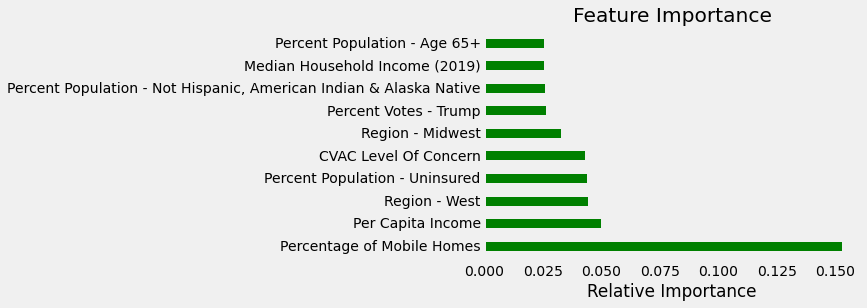

In [856]:
col = ["Percentage of Mobile Homes", 
       "Per Capita Income", 
       "Region - West", 
       "Percent Population - Uninsured", 
       "CVAC Level Of Concern",
       "Region - Midwest", 
       "Percent Votes - Trump", 
       "Percent Population - Not Hispanic, American Indian & Alaska Native", 
       "Median Household Income (2019)", 
       "Percent Population - Age 65+"]
values = feature_importance.importance[0:10]
#plot
plt.figure(figsize=(20,10))
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(values)) # the x locations for the groups
ax.barh(ind, values, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.grid(False)
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.savefig("feature_importance.png", orientation="landscape", bbox_inches="tight")

### Gradient Boosted Regression

In [636]:
from sklearn.ensemble import GradientBoostingRegressor

In [640]:
gbr = GradientBoostingRegressor(random_state=322)

In [643]:
param_grid = {
    "loss" : ["ls", "lad", "huber"],
    "learning_rate" : np.arange(0.1, 1.0, 0.2),
    'max_depth': [10, 30, 50],
    'max_features': ["auto", 30, 40, 50],
    'min_samples_leaf': [3, 5, 10],
    'n_estimators': [100]
}
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=322, test_size=0.3, train_size=None),
             estimator=GradientBoostingRegressor(random_state=322), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [10, 30, 50],
                         'max_features': ['auto', 30, 40, 50],
                         'min_samples_leaf': [3, 5, 10],
                         'n_estimators': [100]},
             verbose=2)

In [644]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 50,
 'max_features': 30,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [655]:
params = {'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 50,
 'max_features': 30,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [883]:
gbr = GradientBoostingRegressor(
    learning_rate = 0.1, 
    loss = "ls",
    max_depth=50,
    max_features=30,
    min_samples_leaf=10,
    n_estimators = 2000,
    random_state=322)

In [884]:
scores = []
mse = []
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    gbr.fit(X_train, y_train)
    scores.append(gbr.score(X_test, y_test))
    y_pred = gbr.predict(X_test)

    mse.append(mean_squared_error(y_test, y_pred))

In [885]:
rmse = [np.sqrt(x) for x in mse]

In [886]:
np.mean(mse)

0.00026131777208530406

In [887]:
np.mean(rmse)

0.01615750764717932

In [888]:
np.mean(scores)

0.7069605170383839

In [ ]:
0.7069606467574113
0.0002613176459038582

0.7069606467574113

In [919]:
x_numerical.columns.to_list()

['zero_risk_factors_pct',
 '1or2_risk_factors_pct',
 'three_plus_risk_factors_pct',
 'Social Vulnerability Index (SVI)',
 'CVAC level of concern for vaccination rollout',
 'per_biden',
 'per_trump',
 'pct_female',
 'pct_male',
 'WA_TOTAL_PCT',
 'BA_TOTAL_PCT',
 'IA_TOTAL_PCT',
 'AA_TOTAL_PCT',
 'NA_TOTAL_PCT',
 'TOM_TOTAL_PCT',
 'WAC_TOTAL_PCT',
 'BAC_TOTAL_PCT',
 'IAC_TOTAL_PCT',
 'AAC_TOTAL_PCT',
 'NAC_TOTAL_PCT',
 'NH_TOTAL_PCT',
 'NHWA_TOTAL_PCT',
 'NHBA_TOTAL_PCT',
 'NHIA_TOTAL_PCT',
 'NHAA_TOTAL_PCT',
 'NHNA_TOTAL_PCT',
 'NHTOM_TOTAL_PCT',
 'NHWAC_TOTAL_PCT',
 'NHBAC_TOTAL_PCT',
 'NHIAC_TOTAL_PCT',
 'NHAAC_TOTAL_PCT',
 'NHNAC_TOTAL_PCT',
 'H_TOTAL_PCT',
 'HWA_TOTAL_PCT',
 'HBA_TOTAL_PCT',
 'HIA_TOTAL_PCT',
 'HAA_TOTAL_PCT',
 'HNA_TOTAL_PCT',
 'HTOM_TOTAL_PCT',
 'HWAC_TOTAL_PCT',
 'HBAC_TOTAL_PCT',
 'HIAC_TOTAL_PCT',
 'HAAC_TOTAL_PCT',
 'HNAC_TOTAL_PCT',
 'jail_2018_pop_pct',
 'Median Household Income (2019)',
 '2015-2019_completing_college',
 '2015-2019_some_college',
 '2015-2019

In [928]:
feat_imp = gbr.feature_importances_
feature_importance = pd.DataFrame(columns = ["feature", "importance"])
feature_importance.feature = x_numerical.columns
feature_importance.importance = feat_imp
feature_importance = feature_importance.sort_values(by="importance", ascending=False).reset_index()
feature_importance.head(10)

,index,feature,importance
0,52,EP_PCI,0.067431
1,60,EP_MOBILE,0.062916
2,4,CVAC level of concern for vaccination rollout,0.057293
3,45,Median Household Income (2019),0.050201
4,72,region_West,0.042650
5,69,region_Midwest,0.040384
6,64,EP_UNINSUR,0.039323
7,6,per_trump,0.032989
8,5,per_biden,0.029133
9,32,H_TOTAL_PCT,0.028307


<Figure size 1440x720 with 0 Axes>

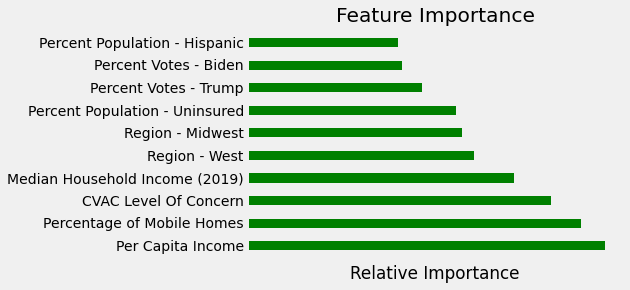

In [929]:
col = ["Per Capita Income", 
       "Percentage of Mobile Homes",
       "CVAC Level Of Concern",
       "Median Household Income (2019)",
       "Region - West",
       "Region - Midwest", 
       "Percent Population - Uninsured", 
       "Percent Votes - Trump", 
       "Percent Votes - Biden", 
       "Percent Population - Hispanic"]
values = feature_importance.importance[0:10]

plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
width = 0.4 
ind = np.arange(len(values)) 
ax.barh(ind, values, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.grid(False)
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.savefig("../images/feature_importance.png", orientation="landscape", bbox_inches="tight")

### Try and Improve Model 

#### Removing highly correlated features or unnecessary features

In [891]:
x_numerical.corr()

,zero_risk_factors_pct,1or2_risk_factors_pct,three_plus_risk_factors_pct,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,per_biden,per_trump,pct_female,pct_male,WA_TOTAL_PCT,BA_TOTAL_PCT,IA_TOTAL_PCT,AA_TOTAL_PCT,NA_TOTAL_PCT,TOM_TOTAL_PCT,WAC_TOTAL_PCT,BAC_TOTAL_PCT,IAC_TOTAL_PCT,AAC_TOTAL_PCT,NAC_TOTAL_PCT,NH_TOTAL_PCT,NHWA_TOTAL_PCT,NHBA_TOTAL_PCT,NHIA_TOTAL_PCT,NHAA_TOTAL_PCT,NHNA_TOTAL_PCT,NHTOM_TOTAL_PCT,NHWAC_TOTAL_PCT,NHBAC_TOTAL_PCT,NHIAC_TOTAL_PCT,NHAAC_TOTAL_PCT,NHNAC_TOTAL_PCT,H_TOTAL_PCT,HWA_TOTAL_PCT,HBA_TOTAL_PCT,HIA_TOTAL_PCT,HAA_TOTAL_PCT,HNA_TOTAL_PCT,HTOM_TOTAL_PCT,HWAC_TOTAL_PCT,HBAC_TOTAL_PCT,HIAC_TOTAL_PCT,HAAC_TOTAL_PCT,HNAC_TOTAL_PCT,jail_2018_pop_pct,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_UNINSUR,urbanicity_rural,urbanicity_small/mid,urbanicity_suburban,urbanicity_urban,region_Midwest,region_Northeast,region_South,region_West
zero_risk_factors_pct,1.000000,-0.647623,-0.737200,-0.605672,-0.481513,-0.258148,0.244766,-0.006018,0.006018,0.444979,-0.342120,-0.199644,-0.196897,-0.107286,-0.205802,0.436460,-0.344765,-0.206795,-0.186112,-0.093436,0.445371,0.635410,-0.333196,-0.181659,-0.188951,-0.082394,-0.153582,0.629896,-0.333500,-0.184782,-0.177618,-0.081343,-0.445371,-0.427269,-0.411585,-0.348226,-0.321498,-0.226656,-0.344789,-0.430073,-0.419008,-0.369662,-0.239875,-0.152475,-0.134986,0.306908,0.104978,0.232112,0.109070,-0.469665,-0.129138,-0.031357,0.264972,0.042425,-0.003306,-0.231711,-0.318153,-0.634265,-0.421817,-0.218748,-0.270744,-0.461468,-0.397082,-0.093594,-0.507046,-0.005967,0.001326,0.131105,-0.300440,0.431280,0.070381,-0.385905,-0.116201
1or2_risk_factors_pct,-0.647623,1.000000,-0.037410,0.222697,0.135525,0.318035,-0.323494,0.020340,-0.020340,-0.244393,0.111884,0.107370,0.435995,0.191229,0.319840,-0.223638,0.120616,0.118526,0.422027,0.166664,-0.358721,-0.416640,0.101372,0.090279,0.429757,0.172397,0.263253,-0.404281,0.107010,0.095618,0.419963,0.159013,0.358721,0.338179,0.371916,0.276135,0.404809,0.233545,0.432747,0.343531,0.399875,0.324656,0.330599,0.198422,-0.002548,0.186029,0.267151,-0.059988,-0.361255,0.057672,0.010547,0.004366,0.109502,-0.444101,0.219345,-0.211246,0.226750,0.412830,0.372950,0.475348,-0.090297,0.365355,0.170593,0.002064,0.190236,-0.253038,0.114887,0.092544,0.323674,-0.257358,0.011349,0.092488,0.252599
three_plus_risk_factors_pct,-0.737200,-0.037410,1.000000,0.596851,0.511314,0.056516,-0.034125,-0.010143,0.010143,-0.366840,0.349456,0.166605,-0.128415,-0.028911,-0.013736,-0.374073,0.345182,0.166091,-0.130178,-0.025290,-0.266037,-0.463876,0.347074,0.158172,-0.133304,-0.044855,-0.032044,-0.467606,0.342472,0.157533,-0.139487,-0.034365,0.266037,0.260513,0.210007,0.211844,0.062648,0.090132,0.068434,0.259445,0.194947,0.196930,0.021400,0.023981,0.179281,-0.567456,-0.374559,-0.251244,0.177293,0.564827,0.160005,0.037251,-0.444585,0.338159,-0.190171,0.491219,0.216183,0.465753,0.222518,-0.134633,0.435136,0.281227,0.369496,0.120928,0.496293,0.232192,-0.103612,-0.253993,0.107016,-0.337416,-0.102354,0.424112,-0.071620
Social Vulnerability Index (SVI),-0.605672,0.222697,0.596851,1.000000,0.710619,0.108925,-0.090309,-0.023438,0.023438,-0.518407,0.489888,0.177313,-0.073130,0.036158,0.095558,-0.519277,0.491293,0.180024,-0.070541,0.015235,-0.314846,-0.611494,0.485313,0.163931,-0.081909,0.007737,0.067561,-0.610241,0.485787,0.164634,-0.083045,0.001685,0.314846,0.300767,0.332989,0.278240,0.197771,0.210108,0.175830,0.301425,0.320668,0.280452,0.104142,0.086048,0.180929,-0.601799,-0.461978,-0.298293,0.186993,0.722403,0.278050,0.124332,-0.666904,-0.214386,0.161070,0.475919,0.608812,0.614813,0.294889,-0.075873,0.531665,0.492789,0.486587,0.216137,0.562855,0.119376,0.002286,-0.199273,0.048077,-0.427841,-0.115223,0.495893,-0.033684
CVAC level of concern for vaccination r

In [892]:
drops = ["zero_risk_factors_pct", "1or2_risk_factors_pct", "three_plus_risk_factors_pct", "Social Vulnerability Index (SVI)", "per_biden", "pct_female"]

In [894]:
x_reduced = x_numerical.drop(drops, axis=1)

In [895]:
x_reduced.corr()

,CVAC level of concern for vaccination rollout,per_trump,pct_male,WA_TOTAL_PCT,BA_TOTAL_PCT,IA_TOTAL_PCT,AA_TOTAL_PCT,NA_TOTAL_PCT,TOM_TOTAL_PCT,WAC_TOTAL_PCT,BAC_TOTAL_PCT,IAC_TOTAL_PCT,AAC_TOTAL_PCT,NAC_TOTAL_PCT,NH_TOTAL_PCT,NHWA_TOTAL_PCT,NHBA_TOTAL_PCT,NHIA_TOTAL_PCT,NHAA_TOTAL_PCT,NHNA_TOTAL_PCT,NHTOM_TOTAL_PCT,NHWAC_TOTAL_PCT,NHBAC_TOTAL_PCT,NHIAC_TOTAL_PCT,NHAAC_TOTAL_PCT,NHNAC_TOTAL_PCT,H_TOTAL_PCT,HWA_TOTAL_PCT,HBA_TOTAL_PCT,HIA_TOTAL_PCT,HAA_TOTAL_PCT,HNA_TOTAL_PCT,HTOM_TOTAL_PCT,HWAC_TOTAL_PCT,HBAC_TOTAL_PCT,HIAC_TOTAL_PCT,HAAC_TOTAL_PCT,HNAC_TOTAL_PCT,jail_2018_pop_pct,Median Household Income (2019),2015-2019_completing_college,2015-2019_some_college,2015-2019_HS_only,2015-2019_not_HS,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_UNINSUR,urbanicity_rural,urbanicity_small/mid,urbanicity_suburban,urbanicity_urban,region_Midwest,region_Northeast,region_South,region_West
CVAC level of concern for vaccination rollout,1.000000,0.186687,0.136038,-0.357408,0.363329,0.127098,-0.184214,-0.004248,0.010358,-0.362306,0.359127,0.132567,-0.172481,-0.016760,-0.352563,-0.514210,0.362245,0.113264,-0.193223,-0.022037,-0.016840,-0.517079,0.357837,0.117087,-0.187501,-0.026124,0.352563,0.349070,0.174816,0.250245,0.143830,0.116353,0.120451,0.348244,0.162726,0.251967,0.061674,0.033597,0.181342,-0.514326,-0.493997,-0.207751,0.220296,0.657503,0.172217,0.051675,-0.615567,-0.109247,0.176605,0.384543,0.337032,0.515556,0.256230,-0.261821,0.567015,0.430507,0.171069,0.164319,0.716187,0.181411,-0.087385,-0.143408,-0.029665,-0.355848,-0.284439,0.501064,-0.011996
per_trump,0.186687,1.000000,0.217145,0.550566,-0.469329,-0.088266,-0.467823,-0.108425,-0.182169,0.546568,-0.476099,-0.075094,-0.440972,-0.107994,0.077189,0.478879,-0.462968,-0.088567,-0.469014,-0.098225,-0.158776,0.473232,-0.467942,-0.072949,-0.450521,-0.103470,-0.077189,-0.058494,-0.380823,-0.055114,-0.221162,-0.129234,-0.209394,-0.061835,-0.384684,-0.070139,-0.200221,-0.126282,0.011691,-0.242543,-0.533024,0.154525,0.458773,0.148519,0.005163,0.008688,-0.287298,0.284662,0.107251,0.312856,-0.328274,-0.479293,-0.144946,-0.551328,0.278503,-0.089019,-0.391604,-0.068112,0.127598,0.352298,-0.164767,-0.186888,-0.294981,0.113249,-0.258725,0.042866,-0.030212
pct_male,0.136038,0.217145,1.000000,0.112272,-0.113245,0.018624,-0.095969,0.001951,-0.039147,0.110952,-0.117840,0.021623,-0.084029,-0.000044,-0.149055,-0.008756,-0.114802,0.011827,-0.099872,0.001911,-0.055918,-0.011755,-0.119363,0.013711,-0.091615,-0.001339,0.149055,0.150871,0.004706,0.093794,0.053572,0.001364,0.046471,0.150331,-0.002391,0.100129,0.033384,0.006804,0.105027,-0.060016,-0.216879,-0.012735,0.161291,0.151479,-0.002938,0.001542,-0.174147,-0.053299,-0.161932,0.043519,-0.139777,0.007986,0.109391,-0.156945,0.177437,0.064840,-0.127812,0.663861,0.047945,0.202086,-0.116902,-0.112026,-0.087652,0.044767,-0.054086,-0.078799,0.105744
WA_TOTAL_PCT,-0.357408,0.550566,0.112272,1.000000,-0.869879,-0.350477,-0.241563,-0.139944,-0.261412,0.997125,-0.872295,-0.343409,-0.242740,-0.143590,-0.035131,0.758008,-0.868220,-0.352602,-0.240277,-0.125776,-0.259007,0.748085,-0.870203,-0.344940,-0.242258,-0.137235,0.035131,0.064782,-0.389287,-0.207723,-0.165622,-0.173493,-0.169718,0.061302,-0.367996,-0.196480,-0.181400,-0.169694,-0.135344,0.175819,-0.014682,0.164712,0.120908,-0.249881,-0.144833,-0.059863,0.195108,0.304497,-0.118093,0.020943,-0.537433,-0.758707,-0.037777,-0.169346,-0.204401,-0.264135,-0.415548,-0.168112,-0.335534,0.134580,-0.045853,-0.067769,-0.174798,0.327447,0.072756,-0.401605,0.075941
BA_TOTAL_PCT,0.363329,-0.469329,-0.113245,-0.869879,1.000000,-0.100932,0.070661,-0.018898,-0.047811,-0.889815,0.999547,-0.113953,0.054985,-0.018523,0.067969,-0.643593,0.999570,-0.096247,0.070271,-0.034705,-0.048861,-0.650437,0.999370,-0.108644,0.056911,-0.025870,-0.067969,-0.080499,0.401339,-0.123268,0.048790,0.094858,-0.024787,-0.080598,0.363499,-0.128938,0.015843,0.021265,0.165

In [896]:
x_reduced.columns

Index(['CVAC level of concern for vaccination rollout', 'per_trump',
       'pct_male', 'WA_TOTAL_PCT', 'BA_TOTAL_PCT', 'IA_TOTAL_PCT',
       'AA_TOTAL_PCT', 'NA_TOTAL_PCT', 'TOM_TOTAL_PCT', 'WAC_TOTAL_PCT',
       'BAC_TOTAL_PCT', 'IAC_TOTAL_PCT', 'AAC_TOTAL_PCT', 'NAC_TOTAL_PCT',
       'NH_TOTAL_PCT', 'NHWA_TOTAL_PCT', 'NHBA_TOTAL_PCT', 'NHIA_TOTAL_PCT',
       'NHAA_TOTAL_PCT', 'NHNA_TOTAL_PCT', 'NHTOM_TOTAL_PCT',
       'NHWAC_TOTAL_PCT', 'NHBAC_TOTAL_PCT', 'NHIAC_TOTAL_PCT',
       'NHAAC_TOTAL_PCT', 'NHNAC_TOTAL_PCT', 'H_TOTAL_PCT', 'HWA_TOTAL_PCT',
       'HBA_TOTAL_PCT', 'HIA_TOTAL_PCT', 'HAA_TOTAL_PCT', 'HNA_TOTAL_PCT',
       'HTOM_TOTAL_PCT', 'HWAC_TOTAL_PCT', 'HBAC_TOTAL_PCT', 'HIAC_TOTAL_PCT',
       'HAAC_TOTAL_PCT', 'HNAC_TOTAL_PCT', 'jail_2018_pop_pct',
       'Median Household Income (2019)', '2015-2019_completing_college',
       '2015-2019_some_college', '2015-2019_HS_only', '2015-2019_not_HS',
       'EP_POV', 'EP_UNEMP', 'EP_PCI', 'EP_AGE65', 'EP_AGE17', 'EP_DISA

In [904]:
x_reduced.drop(x_reduced.columns[9:38], axis=1, inplace=True)

In [905]:
X_reduced = StandardScaler().fit_transform(x_reduced)

In [916]:
gbr_reduced = GradientBoostingRegressor(
    learning_rate = 0.1, 
    loss = "ls",
    max_depth=50,
    max_features=30,
    min_samples_leaf=10,
    n_estimators = 1000,
    random_state=322)

In [918]:
scores = []
mse = []
for train_ix, test_ix in cv.split(X_reduced):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    gbr_reduced.fit(X_train, y_train)
    scores.append(gbr_reduced.score(X_test, y_test))
    y_pred = gbr_reduced.predict(X_test)

    mse.append(mean_squared_error(y_test, y_pred))

In [920]:
np.mean(scores)

0.7069606467574113

In [921]:
np.mean(mse)

0.0002613176459038582

In [917]:
len(x_reduced.columns)

38

In [923]:
len(gbr_reduced.feature_importances_)

73

In [911]:
feat_imp = gbr.feature_importances_
feature_importance = pd.DataFrame(columns = ["feature", "importance"])
feature_importance.feature = x_reduced.columns
feature_importance.importance = feat_imp
feature_importance = feature_importance.sort_values(by="importance", ascending=False).reset_index()
feature_importance.head(10)

ValueError: Length of values (73) does not match length of index (38)

## Support Vector Regression

In [859]:
from sklearn.svm import SVR

In [860]:
svr = SVR()

In [861]:
param_grid = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    'C' : [1,5,10],
    'coef0' : [0.01,10,0.5]}
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=322, test_size=0.3, train_size=None),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [862]:
grid_search.best_params_

{'C': 1, 'coef0': 0.01, 'kernel': 'linear'}

In [863]:
svr = SVR(C = 1, kernel="linear")

In [864]:
scores = []
mse = []
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    svr.fit(X_train, y_train)
    scores.append(svr.score(X_test, y_test))
    y_pred = svr.predict(X_test)

    mse.append(mean_squared_error(y_test, y_pred))